In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import itertools
import mdtraj as md
import mdtraj.testing
import numpy as np
import pandas as pd
import wernet_nilsson as wn
import baker_hubbard_pf as bh
import seaborn as sns

In [2]:
structure = bh.load_pdb_bio('prep_ala10.pdb')
contacts = bh.count_heavy_atom_contacts_sigmoid(structure, distance_threshold=6.5, d0 = 0, k = 1)
hbonds = bh.calculate_hbond_number('prep_ala10.pdb')


In [3]:
hbonds

{5: 1, 6: 1, 7: 1, 8: 2, 9: 2, 10: 1, 1: 0, 2: 0, 3: 0, 4: 0}

In [7]:
# t = md.load_pdb('stateH+babel.pdb')
# hbonds = md.baker_hubbard(t)
# hbonds
#drop duplicates of hbonds with th same hbond[0] abd hbond[2], but hbond[1] is can be different

# def get_residues(t, hbond):
#     res1 = t.topology.atom(hbond[0]).residue.index
#     res2 = t.topology.atom(hbond[2]).residue.index
#     return [res1, res2]
# hbonds = md.baker_hubbard(t, periodic=False)
# label = lambda hbond : '%s -- %s' % (t.topology.atom(hbond[0]), t.topology.atom(hbond[2]))
# for hbond in hbonds:
#     print(label(hbond))

contacts

{1: 3.979780619472406,
 2: 4.974318711201843,
 3: 5.972876528519824,
 4: 9.898936271600116,
 5: 12.836704791411078,
 6: 15.822378460386851,
 7: 14.794725976399176,
 8: 11.81629046886425,
 9: 9.863355340866992,
 10: 11.873714263902016}

In [4]:
#the eqution for protection factor is bh*contact + bc*hbond
#bh and bc are the coefficients for the contact and hbond respectively
def calculate_protection_factors(contacts, hbonds, bh = 0.35, bc = 2):
    protection_factors = {}
    for residue in contacts:
        protection_factors[residue] = bh*contacts[residue] + bc*hbonds[residue]
    return protection_factors
pf = calculate_protection_factors(contacts, hbonds)

In [5]:
#make this into a pandas dataframe
df = pd.DataFrame.from_dict(pf, orient='index', columns=['Protection Factor'])
df = df.reset_index()
#rename index column to be res_num and protection factor to be pf
df = df.rename(columns={'index': 'res_num', 'Protection Factor': 'pf'})
df

,res_num,pf
0,1,1.392923
1,2,1.741012
2,3,2.090507
3,4,3.464628
4,5,6.492847
5,6,7.537832
6,7,7.178154
7,8,8.135702
8,9,7.452174
9,10,6.155800


In [6]:
# dict = bh.estimate_protection_factors_sigmoid('stateH_H_new.pdb', distance_threshold=6.5) 
# dict_1 = bh.estimate_protection_factors_sigmoid('stateU_H_new.pdb')
# #convert dictionary to dataframe
# state2_imp = pd.DataFrame(list(dict.items()), columns=['res_num', 'yg_pf_2'])
# state1_imp = pd.DataFrame(list(dict_1.items()), columns=['res_num', 'yg_pf_1'])
# #merge dataframes
# merged_imp = pd.merge(state1_imp, state2_imp, on='res_num')
# #calculate the difference in protection factors
# merged_imp['yg_diff'] = merged_imp['yg_pf_2'] - merged_imp['yg_pf_1']
# merged_imp

# sequence = 'MAPLRKTAVLKLYVAGNTPNSVRALKTLNNILEKEFKGVYALKVIDVLKNPQLAEEDKILATPTLAKVLPPPVRRIIGDLSNREKVLIALRLLAEEIGD'
# #create a new column in merged_imp dataframe with the amino acid

# merged_imp['aa'] = [sequence[i-1] for i in merged_imp['res_num']]
# #drop rows that are proline or glycine
# merged_imp = merged_imp[merged_imp['aa'] != 'P']
# merged_imp = merged_imp[merged_imp['aa'] != 'G']

In [7]:
#read in hdxer data
state1_forrest = '/Users/yuliagutierrez/Desktop/F24/sali_lab/rotation_project/stateU_logPF.dat'
state2_forrest = '/Users/yuliagutierrez/Desktop/F24/sali_lab/rotation_project/ala10_PF.dat'

# state1_forrest = pd.read_csv(state1_forrest, delim_whitespace=True)
state2_forrest = pd.read_csv(state2_forrest, delim_whitespace=True)

# state1_forrest.rename(columns={'#': 'res_num', 'ResID': 'hxder_log_pf_s1'}, inplace=True)
# state1_forrest

# #drop all columns except for the res_num and hxder_pf
# state1_forrest = state1_forrest[['res_num', 'hxder_log_pf_s1']]

# #add one to the res_num column 
# state1_forrest['res_num'] = state1_forrest['res_num'] + 1

#state2
state2_forrest.rename(columns={'#': 'res_num', 'ResID': 'hxder_log_pf_s2'}, inplace=True)
state2_forrest = state2_forrest[['res_num', 'hxder_log_pf_s2']]

#add one to the res_num column
state2_forrest['res_num'] = state2_forrest['res_num'] + 1

# #merge the two dataframes
# merged_forrest = pd.merge(state1_forrest, state2_forrest, on='res_num')
# #calculate the difference in protection factors
# merged_forrest['hdxer_diff'] = merged_forrest['hxder_log_pf_s2'] - merged_forrest['hxder_log_pf_s1']
# merged_forrest

# #merge the two dataframes
# merged = pd.merge(merged_imp, merged_forrest, on='res_num')
# merged

# #plot the difference in protection factors
# plt.scatter(merged['yg_diff'], merged['hdxer_diff'])
# #calculate the corelation coefficient
# merged['yg_diff'].corr(merged['hdxer_diff'])

# #add x and y labels and the pearson correlation coefficient to the plot 
# plt.xlabel('IMP Log Fold Change')
# plt.ylabel('HDXer Log Fold Change')
# #mvoe the text to the top left corner
# plt.text(0.05, 0.95, f'pearson r: {merged["yg_diff"].corr(merged["hdxer_diff"]):.2f}', transform=plt.gca().transAxes, fontsize=12)
# plt.title ("Baker Hubbard")
# plt.savefig('bh_logfoldchange.png', dpi = 600)


/var/folders/n0/ny5865_5769bgkky50n4qpg40000gp/T/ipykernel_72961/3528381.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  state2_forrest = pd.read_csv(state2_forrest, delim_whitespace=True)


In [8]:
state2_forrest

,res_num,hxder_log_pf_s2
0,2,1.75
1,3,2.10
2,4,3.50
3,5,4.55
4,6,7.60
5,7,7.25
6,8,8.20
7,9,5.50
8,10,4.20


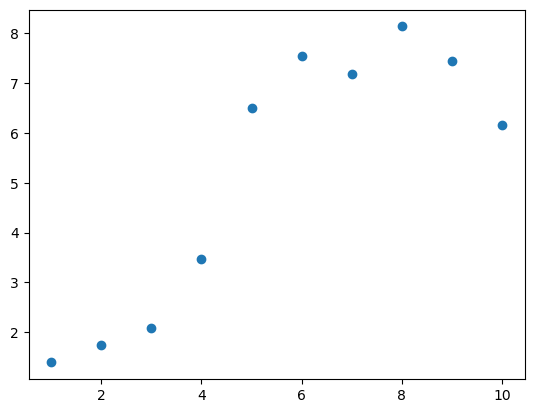

In [9]:
plt.scatter(df['res_num'], df['pf'])

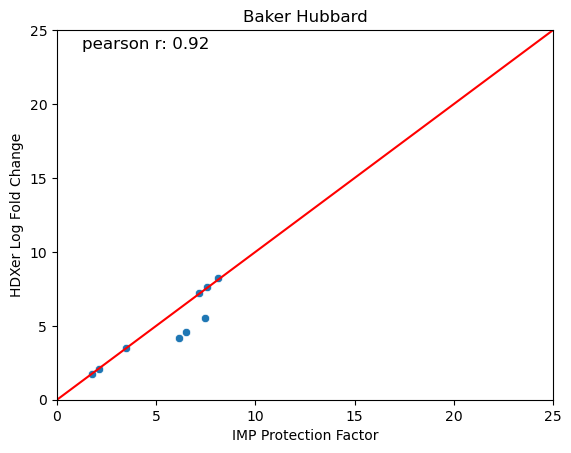

In [10]:
sequence = 'MAPLRKTAVLKLYVAGNTPNSVRALKTLNNILEKEFKGVYALKVIDVLKNPQLAEEDKILATPTLAKVLPPPVRRIIGDLSNREKVLIALRLLAEEIGD'

merged = pd.merge(df, state2_forrest, on='res_num')
merged['aa'] = [sequence[i-1] for i in merged['res_num']]

amino_acid_codes = [
    "A",  # Alanine
    "R",  # Arginine
    "N",  # Asparagine
    "D",  # Aspartic Acid
    "C",  # Cysteine
    "E",  # Glutamic Acid
    "Q",  # Glutamine
    "G",  # Glycine
    "H",  # Histidine
    "I",  # Isoleucine
    "L",  # Leucine
    "K",  # Lysine
    "M",  # Methionine
    "F",  # Phenylalanine
    "P",  # Proline
    "S",  # Serine
    "T",  # Threonine
    "W",  # Tryptophan
    "Y",  # Tyrosine
    "V"   # Valine
]

#plot correlation between protection factors
sns.scatterplot(x = merged['pf'], y = merged['hxder_log_pf_s2'])
#calculate the corelation coefficient
merged['pf'].corr(merged['hxder_log_pf_s2'])
#print the correlation coefficient on the plot
plt.text(0.05, 0.95, f'pearson r: {merged["pf"].corr(merged["hxder_log_pf_s2"]):.2f}', transform=plt.gca().transAxes, fontsize=12)
#add x and y labels
plt.xlabel('IMP Protection Factor')
plt.ylabel('HDXer Log Fold Change')
plt.title ("Baker Hubbard")
#x and y limits
plt.xlim(0, 25)
plt.ylim(0, 25)
#plot x = y line
plt.plot([0, 25], [0, 25], color='red')
plt.savefig('polyA_scatter.png', dpi = 600)





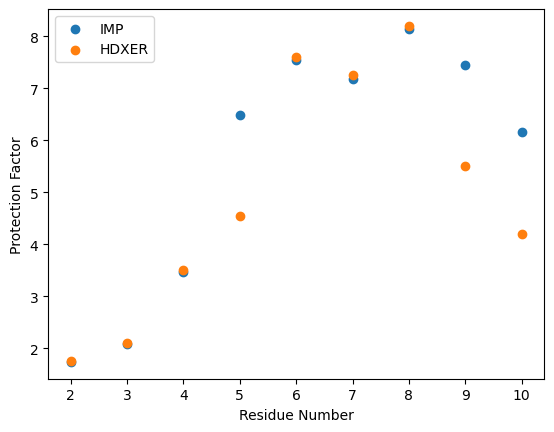

In [11]:
plt.scatter(merged['res_num'], merged['pf'], label = 'IMP')
plt.scatter(merged['res_num'], merged['hxder_log_pf_s2'], label = 'HDXER')
plt.legend(loc = 'upper left')
plt.xlabel('Residue Number')
plt.ylabel('Protection Factor')
plt.savefig('polyA_imp_hdxer.png', dpi = 600)


In [ ]:
merged

<Axes: xlabel='diff', ylabel='Count'>

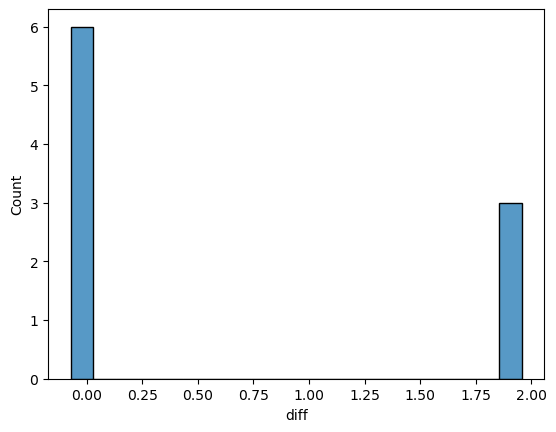

In [12]:
#difference between pf and hdxer_log_pf_s2
merged['diff'] = merged['pf'] - merged['hxder_log_pf_s2']
#histogram of the difference
sns.histplot(merged['diff'], bins = 20)

In [ ]:
merged['diff']

In [ ]:
# plot the correlation between the protection factors of two methods and allows the user to specify 
def plot_correlation(distance_threshold = 7, d0 = 0, k = 1):
    state2_forrest = '/Users/yuliagutierrez/Desktop/F24/sali_lab/rotation_project/stateH_logPF.dat'
    state2_forrest = pd.read_csv(state2_forrest, delim_whitespace=True)
    state2_forrest.rename(columns={'#': 'res_num', 'ResID': 'hxder_log_pf_s2'}, inplace=True)
    state2_forrest = state2_forrest[['res_num', 'hxder_log_pf_s2']]
    state2_forrest['res_num'] = state2_forrest['res_num'] + 1
    structure = bh.load_pdb_bio('stateH+babel.pdb')
    heavy_atoms = bh.count_heavy_atom_contacts_sigmoid(structure, distance_threshold, d0, k)
    hbonds = bh.calculate_hbond_number('stateH+babel.pdb')
    protection_factors = {}
    for residue in contacts:
        protection_factors[residue] = bh*contacts[residue] + bc*hbonds[residue]
pf = calculate_protection_factors(contacts, hbonds, 0.35, 2)
    
    
    
    #make a dictionary of the heavy atom contacts with the residue number as the key
    contacts = {}
    for residue, contact in heavy_atoms.items():
        contacts[residue.id[1]] = contact
    






In [ ]:
plt.scatter(merged['res_num'], merged['yg_diff'])
#change the x and y labels
plt.xlabel('Residue Number')
plt.ylabel('IMP Log Fold Change')
plt.title ("Baker Hubbard")

plt.axvspan(49, 61, color='red', alpha=0.5)

#add y = 0
plt.axhline(0, color='black', linestyle='--')   
#save fig
plt.savefig('bh_resnum.png', dpi = 600)

In [ ]:
plt.scatter(merged['res_num'], merged['hdxer_diff'])

In [ ]:
#merge df and state2_forrest
merged_H = pd.merge(state2_imp, state2_forrest, on='res_num', how='inner') 
merged_H

In [ ]:
#make a scatter plot of the two protection factors
plt.scatter(merged_H['yg_pf_2'], merged_H['hxder_log_pf_s2'])

#change the X and Y labels
plt.xlabel('IMP')
plt.ylabel('HXDER')
plt.title("Log Protection Factors for State H")
#calculate the correlation coefficient
merged_H['yg_pf_2'].corr(merged_H['hxder_log_pf_s2'])

In [ ]:
#make a scatter plot of the two protection factors
plt.scatter(merged['yg_pf_1'], merged['hxder_log_pf_s1'])

#change the X and Y labels
plt.xlabel('IMP')
plt.ylabel('HXDER')
plt.title("Log Protection Factors for State U")
#calculate the correlation coefficient
merged['yg_pf_1'].corr(merged['hxder_log_pf_s1'])


In [ ]:
# Assuming merged_H and merged are DataFrames with the required columns
# merged_H['yg_pf_2'], merged_H['hxder_log_pf_s2'], merged['yg_pf_1'], merged['hxder_log_pf_s1']

plt.figure(figsize=(10, 5))  # Adjust the figure size to be wider
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure with 1 row and 2 columns

# Plot for State H
axs[0].scatter(merged_H['yg_pf_2'], merged_H['hxder_log_pf_s2'])
axs[0].set_title('State H')
axs[0].set_xlabel('IMP PF')
axs[0].set_ylabel('HXDER PF')

# Plot for State U
axs[1].scatter(merged['yg_pf_1'], merged['hxder_log_pf_s1'])
axs[1].set_title('State U')
axs[1].set_xlabel('IMP PF')
axs[1].set_ylabel('HXDER PF')

axs[0].text(0.05, 0.95, f'pearson r: {merged_H["yg_pf_2"].corr(merged_H["hxder_log_pf_s2"]):.2f}', transform=axs[0].transAxes, fontsize=12, verticalalignment='top')
axs[1].text(0.05, 0.95, f'pearson r: {merged["yg_pf_1"].corr(merged["hxder_log_pf_s1"]):.2f}', transform=axs[1].transAxes, fontsize=12, verticalalignment='top')

# Adjust layout for better spacing
plt.tight_layout()

# save the plot
plt.savefig('scatter_plot_bh.png', dpi = 600)

# Show the plot
plt.show()
